In [35]:
import numpy as np
import sys, os
import netCDF4
import scipy.io, numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# file = '/Users/evenhou/Downloads/acsmdata/sgpaosacsmE13.b2.20210725.002214.custom.nc'
# ds = netCDF4.Dataset(file)
# for var in ds.variables.keys():
#     print(var)

In [37]:
# print(ds.variables['time'])
# print("-----------------------------------------------------")
# print(ds.variables['total_organics'])
# print("-----------------------------------------------------")
# print(ds.variables['sulfate'])
# print("-----------------------------------------------------")
# print(ds.variables['ammonium'])
# print("-----------------------------------------------------")
# print(ds.variables['nitrate'])
# print("-----------------------------------------------------")
# print(ds.variables['chloride'])

In [38]:
directory = '/Users/evenhou/Downloads/acsmdata'

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('sgpaosacsmE13.b2.20220502' in filename) and ('.nc' in filename):
            ds = netCDF4.Dataset(filename)
            file_path = os.path.join(directory, filename)
            s1 = ds.dimensions['time']
            # print(filename)
            # print(s1)
            # print(len(s1))
            # print(s1.size)
            dim_time = s1.size
            print(dim_time)
            # define arrays
            time = np.zeros(dim_time)
            total_organics_i = np.zeros(dim_time)
            sulfate_i = np.zeros(dim_time)
            ammonium_i = np.zeros(dim_time)
            nitrate_i = np.zeros(dim_time)
            chloride_i = np.zeros(dim_time)
            total_conc_i = np.zeros(dim_time)

            ncf = scipy.io.netcdf_file(file_path, mmap=False)
            date = int(filename[-25:-17])
            print(date)

            time[:] = ncf.variables["time"].data/3600 # hr
            total_organics_i[:] = ncf.variables["total_organics"].data # ug/m^3
            sulfate_i[:] = ncf.variables["sulfate"].data # ug/m^3
            ammonium_i[:] = ncf.variables["ammonium"].data # ug/m^3
            nitrate_i[:] = ncf.variables["nitrate"].data # ug/m^3
            chloride_i[:] = ncf.variables["chloride"].data # ug/m^3  
            total_conc_i[:] = total_organics_i + sulfate_i + ammonium_i + nitrate_i + chloride_i

51
20220502


In [39]:
np.mean(total_conc_i)

1.350584747157329

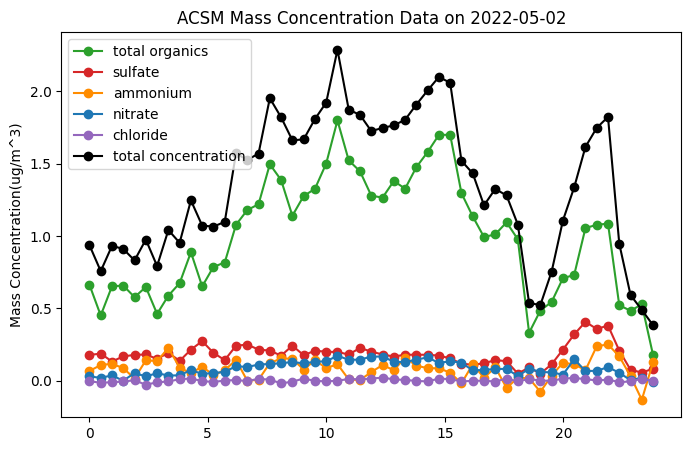

In [41]:
plt.figure(figsize=(8,5))
plt.plot(time,total_organics_i, label='total organics', c='tab:green',marker='o')
plt.plot(time,sulfate_i, label='sulfate', c='tab:red',marker='o')
plt.plot(time,ammonium_i, label='ammonium', c='darkorange',marker='o')
plt.plot(time,nitrate_i, label='nitrate', c='tab:blue',marker='o')
plt.plot(time,chloride_i, label='chloride', c='tab:purple',marker='o')
plt.plot(time,total_conc_i, label='total concentration', c='black',marker='o')
date_str = f"{date:8}"  # Convert to string for formatting
formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
plt.title(f'ACSM Mass Concentration Data on {formatted_date}')
# plt.xlabel('Time')
plt.ylabel('Mass Concentration(ug/m^3)')
plt.legend()
plt.savefig("/Users/evenhou/Downloads/plot_12_08.png")